In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


###### Basic Summary

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.shape

(1000, 17)

###### Handling/Checking Missing Values

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

###### Repalcing Column name spaces

In [9]:
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


###### Convert argument to datetime

In [11]:
df['Date'] = pd.to_datetime(df.Date)

In [12]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


###### Adding Month Name Column

In [14]:
df['MonthName'] = df.Date.dt.strftime('%B')

In [15]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,MonthName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February


## Visualization

In [16]:
df.groupby('MonthName').Total.mean().sort_values(ascending = False)

MonthName
January     330.374625
February    320.856020
March       317.262339
Name: Total, dtype: float64

###### Monthly Sales

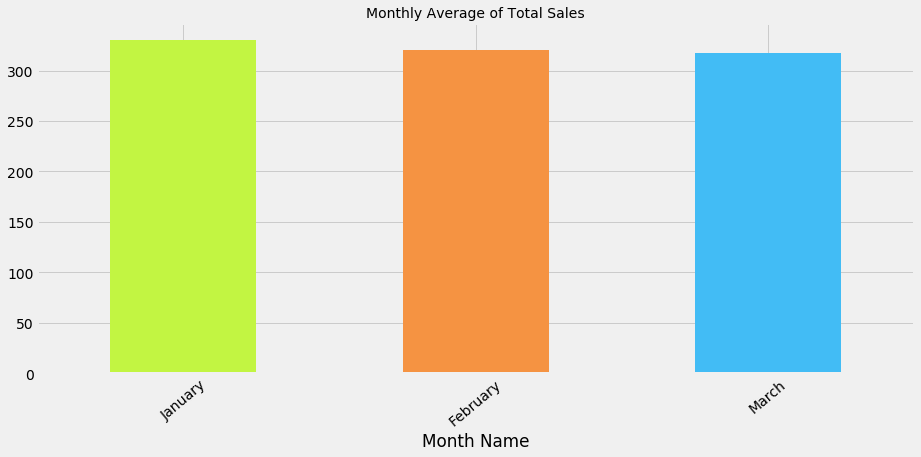

In [17]:
monthly_avg_total = df.groupby('MonthName').Total.mean().sort_values(ascending = False)

color = ['#c2f542', '#f59342', '#42bcf5']
monthly_avg_total.plot(kind = 'bar', color = color, rot = 40)

plt.title('Monthly Average of Total Sales', fontsize = 14)
plt.xlabel('Month Name')
plt.show()

###### Total Sales By Product Line

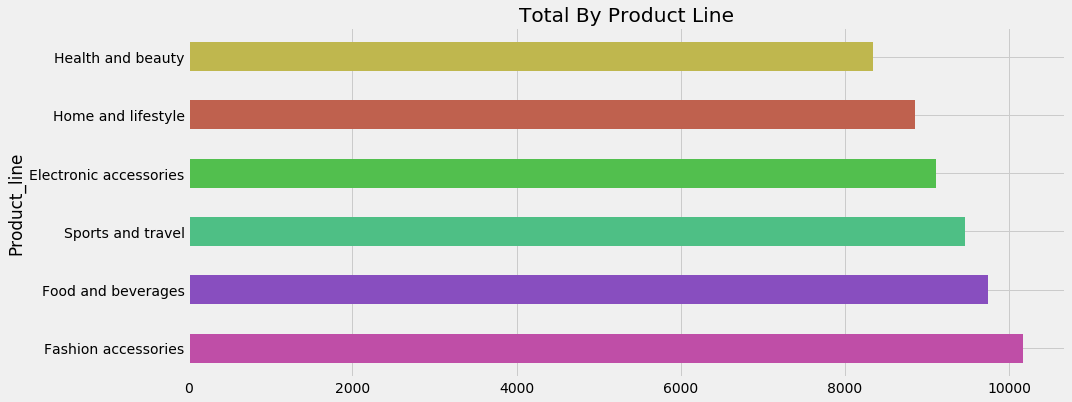

In [18]:
unit = df.groupby('Product_line').Unit_price.sum().sort_values(ascending = False)

colors = ['#bf4ea7','#884ebf', '#4ebf85', '#52bf4e', '#bf614e', '#bfb74e']
unit.plot(kind = 'barh', color = colors)
plt.title('Total By Product Line')
plt.show()

###### Rating By Product Line

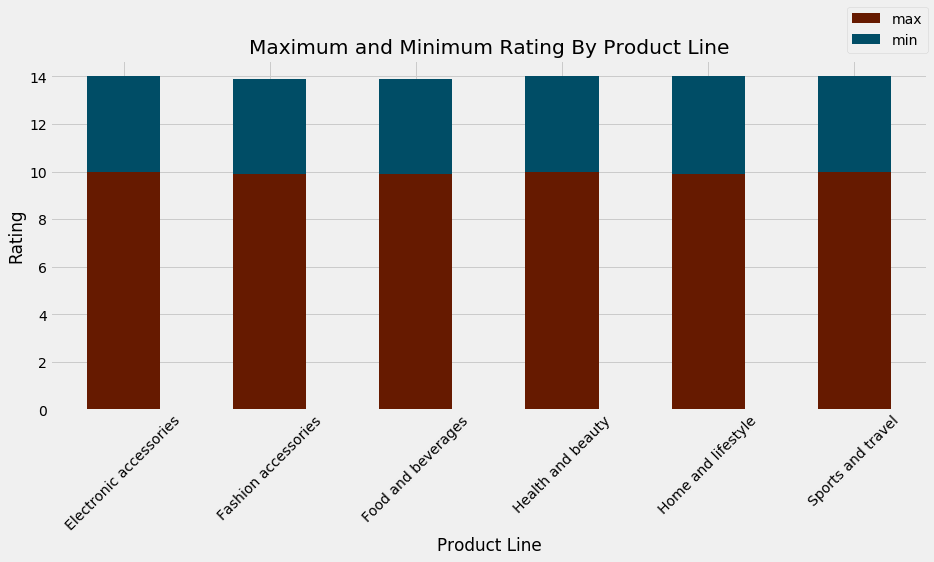

In [19]:
df.groupby('Product_line').Rating.agg(['max', 'min']).plot(kind = 'bar', 
                                        stacked = True, rot = 45, color = ['#661a00', '#004d66'])

plt.title('Maximum and Minimum Rating By Product Line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.legend(loc="best", bbox_to_anchor=(0.9, 1))
plt.show()

###### Who Does More Shopping

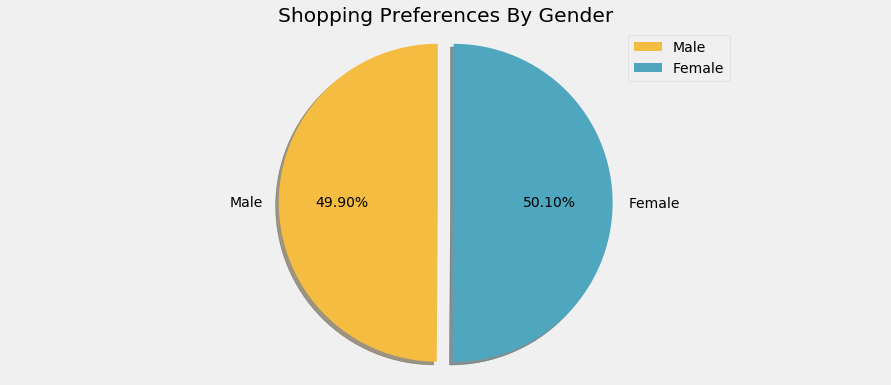

In [20]:
Male = df.loc[df['Gender'] == 'Male'].count()[0]
Female = df.loc[df['Gender'] == 'Female'].count()[0]

labels = ['Male', 'Female']
explode = (0, 0.1)

plt.pie([Male, Female], labels = labels, autopct = "%.2f%%", colors = ['#f5bc42', '#4ea7bf'],
                shadow=True, startangle = 90, explode=explode)

plt.title('Shopping Preferences By Gender')
plt.legend(loc="best", bbox_to_anchor=(0.7, 1))
plt.axis('equal')
plt.show()

###### Total By Customer Type

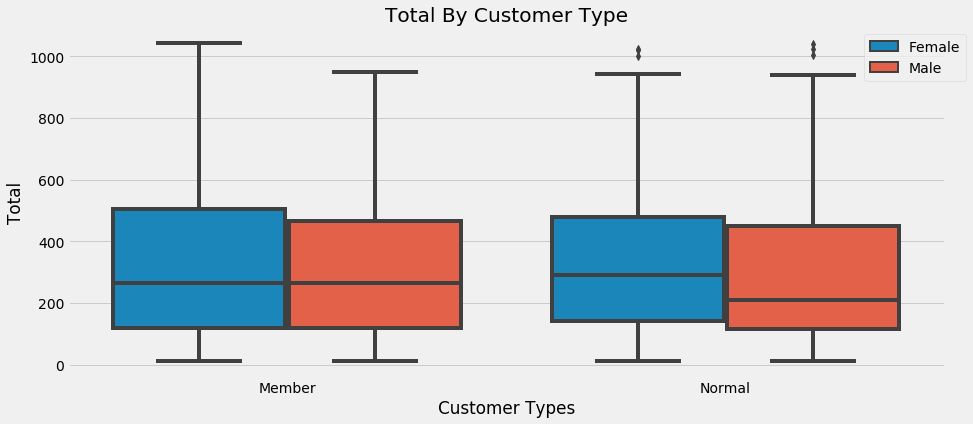

In [21]:
sb.boxplot(x = 'Customer_type', y = 'Total', data = df, hue = df.Gender)

plt.title('Total By Customer Type')
plt.xlabel('Customer Types')
plt.legend(loc="best", bbox_to_anchor=(0.9, 1))
plt.show()

In [22]:
df['Time'] = pd.to_datetime(df['Time'])

In [23]:
type(df.Time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df.Time.dt.hour.head()

0    13
1    10
2    13
3    20
4    10
Name: Time, dtype: int64

In [25]:
df['Hour'] = df.Time.dt.hour

In [26]:
df.tail()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,MonthName,Hour
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2020-03-10 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2020-03-10 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,March,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2020-03-10 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2020-03-10 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February,15
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,2020-03-10 13:28:00,Cash,618.38,4.761905,30.9190,6.6,February,13


## https://seaborn.pydata.org/generated/seaborn.lineplot.html

###### Hourly Sales

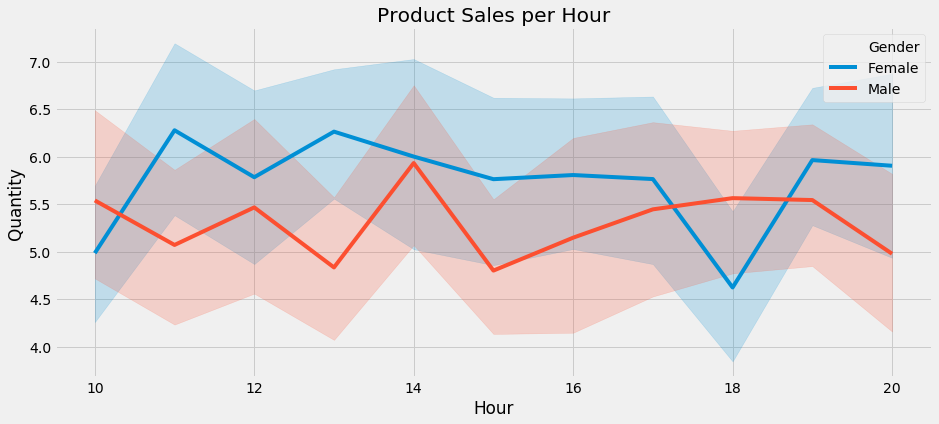

In [27]:
sb.lineplot(x = 'Hour' , y = 'Quantity', data = df,  markers = True, dashes = False, hue = 'Gender'
           ).set_title("Product Sales per Hour")

plt.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.show()

###### Cost of Goods By Hour

## https://seaborn.pydata.org/generated/seaborn.pointplot.html

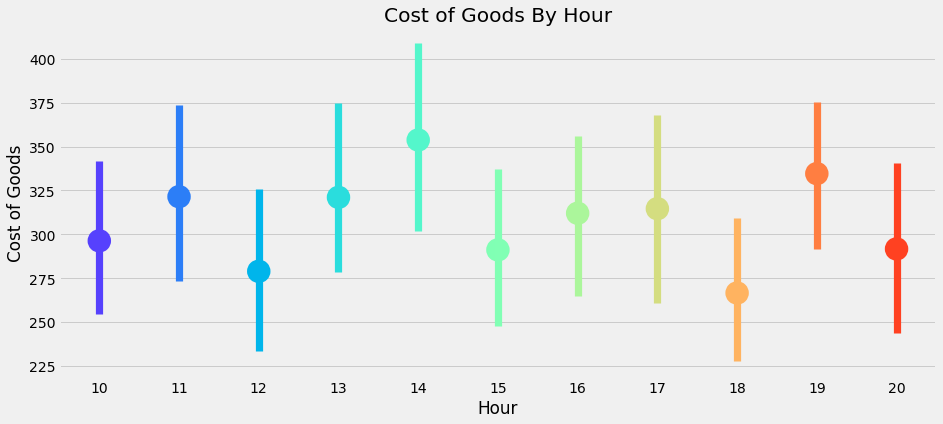

In [28]:
sb.pointplot(x = "Hour", y= "cogs", data = df,  palette = 'rainbow')

plt.title('Cost of Goods By Hour')
plt.ylabel('Cost of Goods')
plt.show()

###### Total Numbers of Product Line

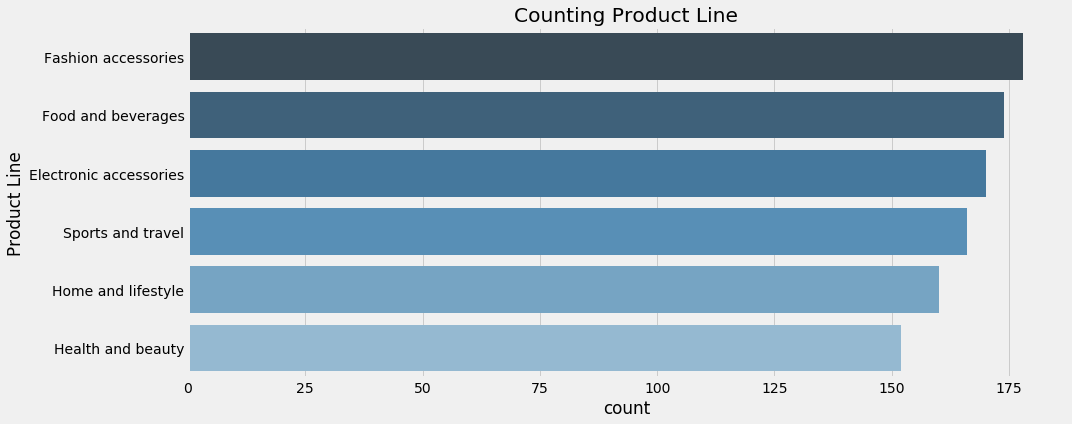

In [29]:
sb.countplot(y = 'Product_line', data = df, palette = "Blues_d", order = df['Product_line'].value_counts().index )

plt.title('Counting Product Line')
plt.ylabel('Product Line')
plt.show()

###### Gross Income by City

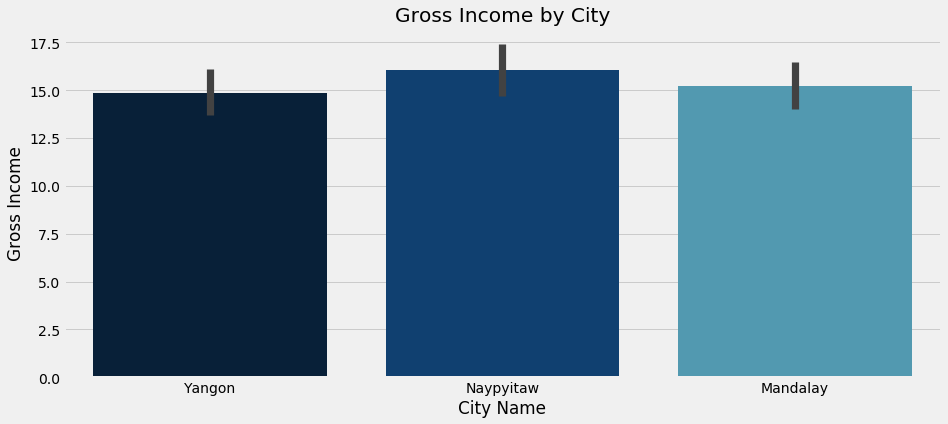

In [30]:
sb.barplot(x = df['City'], y = df['gross_income'], palette = 'ocean').set_title('Gross Income by City')

plt.xlabel('City Name')
plt.ylabel('Gross Income')
plt.show()

###### Sales(Percentage) By City 

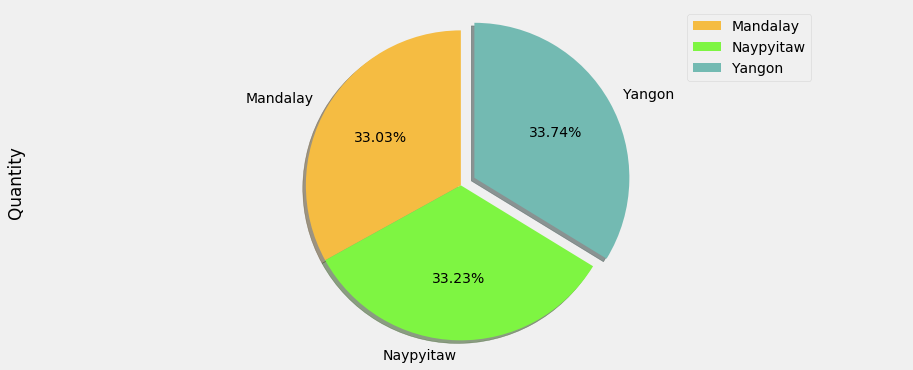

In [31]:
explode = (0, 0, 0.1)
df.groupby('City').Quantity.sum().plot.pie(autopct = "%.2f%%", colors = ['#f5bc42', '#7ef542', '#73bab2'],
                       shadow=True, startangle = 90, explode = explode)


plt.legend(loc="best", bbox_to_anchor = (0.9, 1))
plt.axis('equal')
plt.show()

###### Hourly Total By Gender

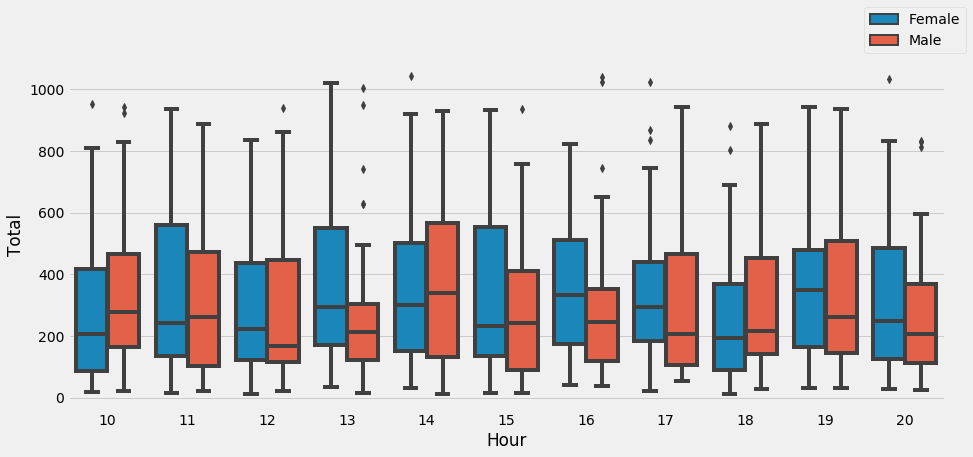

In [32]:
sb.boxplot(x = "Hour", y= "Total", data = df, hue = df.Gender)

plt.legend(loc="best", bbox_to_anchor = (0.9, 1))
plt.show()

###### Tax of Products

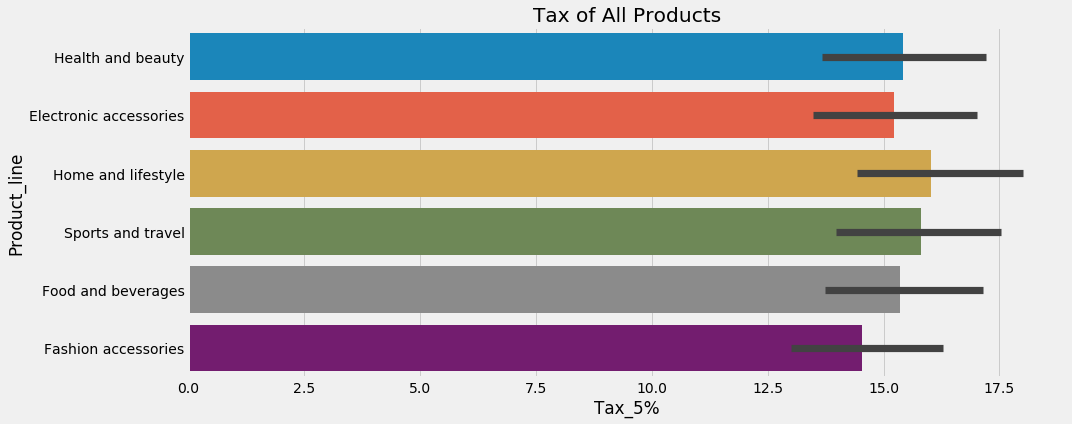

In [33]:
sb.barplot(y = 'Product_line', x = 'Tax_5%', data = df)

plt.title('Tax of All Products')
plt.show()

###### Payment Methods

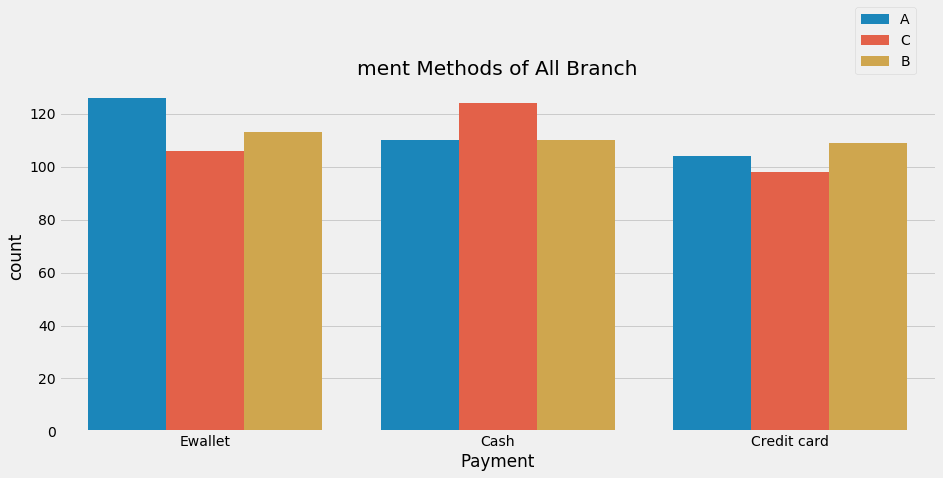

In [34]:
sb.countplot( x = 'Payment', data = df, hue = 'Branch').set_title('ment Methods of All Branch') 
plt.legend(loc="best", bbox_to_anchor = (0.9, 1))
plt.show()